In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

data = pd.read_csv("../datasets/pvq21_REVERSED_CENTRED.csv", sep=',')
lib_dataframe = data.copy()
con_dataframe = data.copy()

ub_dataframe = data.copy()
((ub_dataframe[ub_dataframe['lrscale'] > 7].shape[0])/ ub_dataframe.shape[0]) *100


lrscale_balanced = ub_dataframe['lrscale']

# print(ub_dataframe[ub_dataframe['lrscale'] == 7].shape[0])

lrscale_balanced.hist(bins=11, figsize=[14,6])

print(ub_dataframe.head(20))


FileNotFoundError: [Errno 2] File pvq21_REVERSED_CENTRED.csv does not exist: 'pvq21_REVERSED_CENTRED.csv'

## Balancing the data
Oversampling

1. Randomise dataframe
2. counter variable = 0
3. Go through the dataframe       *Or actually just pick all instances over this lr threshold* 
    3.1 For ever lrscore > threshold
        3.2 Add to a new dataframe
        3.3 counter ++ 
     
4. While the new (balancer) dataframe is <= to the 50% of length of the full dataframe 

    4.1 Copy to itself
    
    
5. Attach balancer dataframe to the previous data frame
6. Return new dataframe 


## Oversampling

In [127]:
#Some exploration:
print(len(ub_dataframe))
print(ub_dataframe.shape)


def balance_samples(unbalanced_dataframe, lrthreshold):
    """Return a balanced dataframe i.e. consisting at 50% of the examples/cases above the lrthreshold (not inclusive)"""
    balancer_dataframe = pd.DataFrame()

    balancer_dataframe = unbalanced_dataframe[unbalanced_dataframe['lrscale'] > lrthreshold].copy()

    #Calculate the 50% 
    half_value = int(len(unbalanced_dataframe)/2)


    #The difference to getting a number of samples equal to 50 % of the original dataset
   # dif_half = half_value - len(balancer_dataframe)

    copy_balancer_dataframe = balancer_dataframe.sample(n = half_value, replace=True).reset_index(drop=True)
    
    balancer_dataframe = pd.concat([balancer_dataframe,copy_balancer_dataframe], axis=0)

    balanced_df = pd.concat([unbalanced_dataframe,balancer_dataframe], axis=0)

    balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

    return balanced_df



36360
(36360, 13)


## Undersampling

In [14]:
def undersample(unbalanced_dataframe, lrthreshold, skew_distribution = 0.5):
    """Return a balanced dataframe i.e. consisting at 50% of the examples/cases above the lrthreshold (inclusive)"""
    balancer_dataframe = unbalanced_dataframe.copy()
    #balancer_data
    minority_df = balancer_dataframe[balancer_dataframe['lrscale'] > lrthreshold]
    minority_count = minority_df.shape[0]

    print("minority_count", minority_count)

    print("TESTHOWMANY??", balancer_dataframe[balancer_dataframe['lrscale'] <= lrthreshold].shape[0])
    #pick and remove a random sample of instances under the set threshold
    majority_balancer = balancer_dataframe[balancer_dataframe['lrscale'] <= lrthreshold].sample(n=minority_count, replace = False)
    
    balanced_df = pd.concat([minority_df,majority_balancer],axis=0)
    balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
    
#     print("majority balancer", majority_balancer.shape[0])
#     print("minority df", minority_df.shape[0])
#     print("balanced df", balanced_df.shape[0])

    
    return balanced_df


In [15]:
lrthreshold = 6
# print(con_dataframe.head())
balanced_dataframe = undersample(ub_dataframe, lrthreshold)

minority_count 9391
TESTHOWMANY?? 26969


In [16]:
undersampled_dataframe = undersample(ub_dataframe,lrthreshold)



print(type(balanced_dataframe))
print(type(undersampled_dataframe))


minority_count 9391
TESTHOWMANY?? 26969
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


(18782, 12)


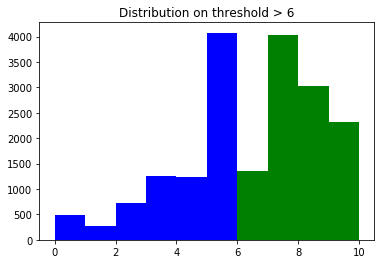

<Figure size 576000x72000 with 0 Axes>

In [17]:
print(undersampled_dataframe.shape)

# balanced_dataframe[balanced_dataframe['lrscale'] > 7].shape[0]
# lrscale_balanced = undersampled_dataframe['lrscale']
# lrscale_balanced.hist(bins=10, figsize=[14,6])

def hist_plotter(dataframe,threshold):
    lrscale_balanced = dataframe['lrscale']
    n,bins,patches = plt.hist(lrscale_balanced, bins=[0, 1, 2, 3, 4, 5, 6,7,8,9,10], color='b')
    plt.title(f"Distribution on threshold > {threshold}") 
    plt.figure(figsize=(8000,1000))
    
    for patch_num in range(threshold, 10):
        patches[patch_num].set_fc('g')

hist_plotter(undersampled_dataframe,lrthreshold)


In [18]:
print(f"The percenatge of scores over {lrthreshold} ",((undersampled_dataframe[undersampled_dataframe['lrscale'] > lrthreshold].shape[0]) / undersampled_dataframe.shape[0])*100)


The percenatge of scores over 6  50.0


In [19]:

print(balanced_dataframe.head())

   lrscale  universalism  achievement  benevolence  self_direction  \
0        5          4.90     2.066667     4.566667        2.566667   
1        6          4.00     2.000000     4.500000        3.000000   
2        7          2.75     3.583333     4.083333        5.083333   
3        3          4.35     5.016667     4.016667        4.516667   
4        7          4.55     2.550000     4.050000        4.050000   

   stimulation  hedonism     power  security  conformity  tradition     p_avg  
0     2.066667  3.566667  1.566667  4.566667    4.566667   4.566667  3.933333  
1     2.000000  4.000000  3.000000  4.000000    4.000000   4.500000  3.500000  
2     3.083333  3.583333  3.083333  2.583333    2.583333   4.583333  3.416667  
3     3.516667  3.516667  2.516667  3.016667    1.016667   3.516667  4.483333  
4     1.550000  3.050000  2.550000  4.550000    3.550000   4.550000  4.950000  


# Using the (almost) balanced dataset

In [20]:
con_dataframe = undersampled_dataframe.copy()


In [21]:
con_dataframe.shape


(18782, 12)

Bin the data for each dataframe

In [24]:
def normalise_lib (value):

        if value < 3:
            return 1#"liberal" #liberal
        else:
            return 0#"moderate" #moderate

def normalise_con (value):
        
        if value > lrthreshold:
            return 1#"conservative" #conservative
        else:
            return 0#"moderate" #moderate
        

lib_dataframe['lrscale'] = lib_dataframe['lrscale'].apply(normalise_lib)
con_dataframe['lrscale'] = con_dataframe['lrscale'].apply(normalise_con)



Split into features and target

In [29]:
X_lib = lib_dataframe.iloc[:, 1:11].copy()
y_lib = lib_dataframe.iloc[:,0].copy()
#Now the data frame for conservative prediction
X_con = con_dataframe.iloc[:, 1:11].copy()
y_con = con_dataframe.iloc[:,0].copy()

print(X_con.head())
print(y_con.head())

   universalism  achievement  benevolence  self_direction  stimulation  \
0          5.50     4.500000     5.500000        4.000000     3.500000   
1          4.80     4.133333     4.633333        4.633333     3.133333   
2          4.65     1.650000     4.650000        4.150000     0.650000   
3          3.60     3.433333     3.433333        3.933333     2.933333   
4          4.45     2.616667     5.116667        4.116667     2.116667   

   hedonism     power  security  conformity  tradition  
0  3.000000  3.000000  2.500000    1.000000   2.500000  
1  3.133333  3.133333  2.633333    2.133333   2.633333  
2  4.150000  2.650000  5.650000    2.650000   4.150000  
3  3.933333  3.433333  3.933333    2.433333   3.933333  
4  5.116667  2.616667  2.616667    2.616667   3.616667  
0    0
1    1
2    5
3    0
4    5
Name: lrscale, dtype: int64


In [163]:
print(list(y_con).count(1))
print(list(y_con).count(0))

con_lib_ratio = (list(y_con).count(1)/(list(y_con).count(0) + list(y_con).count(1)) * 100)
con_lib_ratio


9391
9391


50.0

One Hot encoding 

In [14]:
enc = OneHotEncoder(sparse=False)
y_lib_onehot = enc.fit_transform(y_lib.to_numpy().reshape(-1, 1))
y_con_onehot = enc.fit_transform(y_con.to_numpy().reshape(-1, 1))

Label Encoding instead

In [32]:
label_encoder = LabelEncoder()
y_lib_onehot = label_encoder.fit_transform(y_lib.copy())
y_con_onehot = label_encoder.fit_transform(y_con.copy())



Splitting the data

In [33]:
X_train_lib_oh, X_test_lib_oh, y_train_lib_oh, y_test_lib_oh = train_test_split(X_lib, y_lib_onehot, test_size=0.25, random_state=10)
X_train_con_oh, X_test_con_oh, y_train_con_oh, y_test_con_oh = train_test_split(X_con, y_con_onehot, test_size=0.25, random_state=10)

In [37]:
tup = (X_train_con_oh, y_train_con_oh)

tup[0]

,universalism,achievement,benevolence,self_direction,stimulation,hedonism,power,security,conformity,tradition
17160,4.15,4.150000,4.650000,2.150000,2.650000,3.650000,3.150000,3.650000,3.650000,3.150000
25515,3.60,4.100000,4.100000,4.100000,2.600000,2.600000,3.600000,3.600000,3.100000,3.600000
8023,4.50,2.666667,3.666667,4.166667,2.166667,3.666667,1.666667,4.166667,4.166667,4.166667
24390,4.15,3.983333,3.983333,3.483333,2.483333,2.483333,3.983333,2.983333,3.983333,3.483333
17502,4.50,2.833333,3.833333,3.833333,2.333333,2.833333,2.333333,4.833333,3.833333,3.833333
...,...,...,...,...,...,...,...,...,...,...
10201,4.65,3.150000,5.150000,5.150000,1.150000,1.650000,2.650000,4.650000,2.650000,4.150000
9372,4.30,3.300000,3.800000,3.800000,1.800000,4.300000,1.300000,4.800000,3.300000,4.300000
28017,4.60,3.100000,4.600000,4.600000,4.600000,4.100000,2.100000,2.100000,2.600000,2.600000
29199,3.50,3.166667,4.166667,4.666667,3.166667,2.166667,4.166667,3.166667,4.166667,2.666667


# Models 

Call this function to perform cross validation to the model

In [167]:
def cv(model):
    #return scores
    pass

### Lasso

In [18]:
# class Lasso():
lasso_LIB_model = Lasso(alpha=1.0)
#fitting the liberal model
lasso_LIB_model.fit(X_train_lib_oh,y_train_lib_oh)

lasso_CON_model = Lasso(alpha=1.0)
lasso_CON_model.fit(X_train_con_oh,y_train_con_oh)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
lasso_lib_pred = lasso_LIB_model.predict(X_test_lib_oh)
# print(lasso_lib_pred)

#enc.inverse_transform([np.argmax(lasso_lib_pred[0, :])])
# #print(lasso_lib_pred[0, :])
# print("The ground truth labels:")
# #print(np.argmax(y_test_lib_oh, axis = 1))
# print("Liberal LASSO accuracy: ")
# #print(accuracy_score(y_test_lib_oh, lasso_lib_pred))#np.argmax(y_test_lib_oh, axis = 1), np.argmax(lasso_LIB_model.predict(X_test_lib_oh), axis=1)))
# print(lasso_LIB_model.coef_) #feature significance
# print()
# print(lasso_CON_model.predict(X_test_con_oh))
# print("The ground truth labels:")
# print(y_test_con_oh)
lasso_CON_model.score(X_test_con_oh,y_test_con_oh)
print(lasso_CON_model.intercept_)
#con_preds = lasso_CON_model.predict(X_test_con_oh)


# enc.fit_transform(y_test_con_oh)

#metrics_printer(enc.inverse_transform(y_test_con_oh),enc.invrse_transform(y_test_con_oh))

# for i in con_preds:
#     print(enc.inverse_transform(i))



[0.49943206 0.50056794]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


### Logistic Regression

TIP: One hot encoding does not work well with Logistic Regression; a one hot encoding will case the matrix of input data to become singular, meaning it cannot be inverted and the linear regression coefficients cannot be calculated using linear algebra. For these types of models a dummy variable encoding must be used instead.

So: Label encoding the data for the Logistic Regression (and the Random Forest)

In [334]:
y_lib_cat = y_lib.copy()        #NOT SURE WHAT THIS STEP DOES, MAYBE IT IS REDUNDANT
y_con_cat = y_con.copy()

# y_lib_cat = y_lib_cat.astype('category')
# y_con_cat = y_con_cat.astype('category')

In [335]:
label_encoder = LabelEncoder()
y_lib_labelencoded = label_encoder.fit_transform(y_lib_cat)
y_con_labelencoded = label_encoder.fit_transform(y_con_cat)

## Oversampling (only for CONSERVATIVE PREDICTION for now)

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

In [28]:
from imblearn.over_sampling import RandomOverSampler 
import sklearn
print(sklearn.__version__)

0.22.1


In [336]:
X_train_lib_l, X_test_lib_l, y_train_lib_l, y_test_lib_l = train_test_split(X_lib, y_lib_labelencoded, test_size=0.30, random_state=10)
X_train_con_l, X_test_con_l, y_train_con_l, y_test_con_l = train_test_split(X_con, y_con_labelencoded, test_size=0.30, random_state=10)

In [337]:
logistic_regression_LIB = LogisticRegression(random_state=0)
logistic_regression_LIB.fit(X_train_lib_l, y_train_lib_l)

logistic_regression_CON = LogisticRegression(random_state=0)
logistic_regression_CON.fit(X_train_con_l, y_train_con_l)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [338]:
LR_lib_pred = logistic_regression_LIB.predict(X_test_lib_l)
print("Liberal LR predicts: ",LR_lib_pred )
print("Ground truth: ", y_test_lib_l)

print(accuracy_score(y_test_lib_l, LR_lib_pred))

LR_con_pred = logistic_regression_CON.predict(X_test_con_l)
print("Conservative LR predicts: ", )
print("Ground truth: ", y_test_con_l)
print(accuracy_score(y_test_con_l, LR_con_pred))
print()
print("LIBERAL COEFFICIENTS")
print(logistic_regression_LIB.coef_)

print()
print("CONSERVATIVE COEFFICIENTS")
print(logistic_regression_CON.coef_)

# Liberal LR predicts:  [0 0 0 ... 0 0 0]
# Ground truth:  [1 0 0 ... 0 0 0]
# 0.8820682068206821
# Conservative LR predicts: 
# Ground truth:  [0 0 0 ... 0 1 0]
# 0.7358635863586359


metrics_printer(y_test_con_l, LR_con_pred, f"CONSEVATIVE LOGISTIC REGRESSION - BALANCED - Threshold at {lrthreshold} ")

Liberal LR predicts:  [0 0 0 ... 0 0 0]
Ground truth:  [1 0 0 ... 0 0 0]
0.8825632563256326
Conservative LR predicts: 
Ground truth:  [1 0 0 ... 0 0 1]
0.5908111988513999

LIBERAL COEFFICIENTS
[[ 0.49919619 -0.04080791 -0.13054757 -0.09643039 -0.14987894 -0.08033117
  -0.15718796 -0.19202133 -0.16193753 -0.18695461]]

CONSERVATIVE COEFFICIENTS
[[-0.46179378 -0.02419632 -0.0664999   0.04237721  0.07434872 -0.01327747
   0.09786605  0.15873358  0.05412356  0.21810127]]
CONSEVATIVE LOGISTIC REGRESSION - BALANCED - Threshold at 8 
Accuracy:  0.5908111988513999
Sensitivity:  0.6391304347826087
Specificity:  0.5433854907539118


Result interpretation:

LIBERAL COEFFICIENTS
[[ 0.64696149  0.10334159  0.00508842  0.03620765 -0.00407959  0.05359682
  -0.02097152 -0.05334792 -0.013917   -0.057601  ]]

CONSERVATIVE COEFFICIENTS
[[-0.39614516  0.027852    0.03136662  0.11140505  0.06367177 -0.00044922
   0.11708522  0.08849489  0.14891201  0.24233131]]
   
The external correlations match those given at https://gosling.psy.utexas.edu/wp-content/uploads/2016/12/Sandy-et-al-JPA-2016-Brief-values-measures.pdf

Confusion matrix: 
Shows that the 

In [186]:
cm_lib = metrics.confusion_matrix(y_test_lib_l, LR_lib_pred)
print("liberal confusion matrix: \n", cm_lib)

cm_con = metrics.confusion_matrix(y_test_con_l, LR_con_pred)
print("conservative confusion matrix: \n", cm_con)

liberal confusion matrix: 
 [[9627    0]
 [1281    0]]
conservative confusion matrix: 
 [[916 683]
 [661 955]]


### Cross validation

In [18]:
logistic_regression_LIB_CVVVVV = LogisticRegression(random_state=0)

cv_results_lib = cross_validate(logistic_regression_LIB_CVVVVV, X_lib, y_lib_labelencoded, cv=10)

cv_results_con = cross_validate(logistic_regression_CON, X_con, y_con_labelencoded, cv=3)

print(cv_results_lib['test_score'])

print()

[0.88476348 0.88476348 0.88476348 0.88476348 0.88476348 0.88476348
 0.88476348 0.88476348 0.8850385  0.8850385 ]



## Random Forest

… there are occasions when a complete set of dummy variables is useful. For example, the splits in a tree-based model are more interpretable when the dummy variables encode all the information for that predictor. We recommend using the full set if dummy variables when working with tree-based models.

In [339]:
rf_lib = RandomForestClassifier(max_depth=None, random_state=0)
rf_lib.fit(X_train_lib_l, y_train_lib_l)

rf_con = RandomForestClassifier(max_depth= None, random_state=0)
rf_lib.fit(X_train_con_l, y_train_con_l)


rf_lib_predicted = rf_lib.predict(X_test_lib_l)
rf_con_predicted = rf_lib.predict(X_test_con_l)

print("Accuracy of liberal Random Forest ", accuracy_score(y_test_lib_l,rf_lib_predicted))
print("Accuracy of conservative Random Forest ", accuracy_score(y_test_con_l,rf_con_predicted))


Accuracy of liberal Random Forest  0.5145764576457645
Accuracy of conservative Random Forest  0.5721464465183058


In [340]:
rf_cm_lib = metrics.confusion_matrix(y_test_lib_l, rf_lib_predicted)
print("liberal confusion matrix: \n", rf_cm_lib)

rf_cm_con = metrics.confusion_matrix(y_test_con_l, rf_con_predicted)
print("conservative confusion matrix: \n", rf_cm_con)

liberal confusion matrix: 
 [[5124 4503]
 [ 792  489]]
conservative confusion matrix: 
 [[397 306]
 [290 400]]


In [341]:
metrics_printer(y_test_con_l, rf_con_predicted, f"Random Forest Conservative - BALANCED DATA - threshold at {lrthreshold}")

Random Forest Conservative - BALANCED DATA - threshold at 8
Accuracy:  0.5721464465183058
Sensitivity:  0.5797101449275363
Specificity:  0.5647226173541963


## Naive Bayes (ToDo)

In [21]:
lib_gnb = GaussianNB()

lib_gnb.fit(X_train_lib_l, y_train_lib_l)


con_gnb = GaussianNB()

con_gnb.fit(X_train_con_l, y_train_con_l)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
lib_gnb_predicted = lib_gnb.predict(X_test_lib_l)
gnb_cm_lib = metrics.confusion_matrix(y_test_lib_l,lib_gnb_predicted)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_lib_l,lib_gnb_predicted).ravel()

con_gnb_predicted = con_gnb.predict(X_test_con_l)
gnb_cm_con = metrics.confusion_matrix(y_test_con_l,con_gnb_predicted)
print(accuracy_score(y_test_lib_l,lib_gnb_predicted))
print(gnb_cm_lib)
print(tn, fp, fn, tp)
print(accuracy_score(y_test_con_l,con_gnb_predicted))
print(gnb_cm_con)



0.8735790245691236
[[9454  173]
 [1206   75]]
9454 173 1206 75
0.7355152181884855
[[7963   86]
 [2799   60]]


## Feature selection - experiments: 
*first attempt on the conservative classifier*

Liberal significant features: 

Conservative significant features: Conformity, Tradition, Universalism, Self direction, Stimulation, Hedonism, Achievement (power), Security



In [52]:
X_con_featureslected = X_con.copy().drop(['benevolence'], axis = 1)

X_con_featureslected.head()

,universalism,achievement,self_direction,stimulation,hedonism,power,security,conformity,tradition
0,3.65,2.816667,4.316667,3.316667,3.816667,3.816667,2.316667,3.816667,4.316667
1,3.70,4.700000,5.200000,2.700000,3.200000,1.700000,5.200000,1.700000,4.700000
2,3.35,3.516667,3.516667,3.516667,4.016667,3.016667,3.516667,2.016667,3.516667
3,3.90,4.566667,4.566667,3.066667,2.566667,1.066667,4.566667,3.566667,3.066667
4,4.70,3.533333,4.533333,3.533333,3.533333,2.533333,3.033333,2.033333,3.533333


In [53]:
X_train_con_oh_fs, X_test_con_oh_fs, y_train_con_oh_fs, y_test_con_oh_fs = train_test_split(X_con_featureslected, y_con_onehot, test_size=0.25, random_state=10)

NameError: name 'y_con_onehot' is not defined

In [25]:
fs_con_gnb = GaussianNB()

fs_con_gnb.fit(X_train_con_oh_fs, y_train_con_oh_fs)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
fs_con_gnb_predicted = fs_con_gnb.predict(X_test_con_oh_fs)
fs_gnb_cm_con = metrics.confusion_matrix(y_test_con_oh_fs,fs_con_gnb_predicted)
print(metrics.confusion_matrix(y_test_con_oh_fs,fs_con_gnb_predicted).ravel())
print(accuracy_score(y_test_con_oh_fs,fs_con_gnb_predicted))

print(label_encoder.inverse_transform(fs_con_gnb_predicted))
print(metrics.confusion_matrix(y_test_con_oh_fs,fs_con_gnb_predicted))

print(list(fs_con_gnb_predicted).count(0))
print(list(label_encoder.inverse_transform(fs_con_gnb_predicted)).count('conservative'))

[6657   34 2378   21]
0.7346534653465346
[0 0 0 ... 0 0 0]
[[6657   34]
 [2378   21]]
9035
0


Observations: 
(with normalisations of conservatives over 7 (i.e. > 7)
- NB using OneHot encoding and having removed Benevolence: 93% accuracy
[   2  605]
 [   4 8479]]
 
- NB using OneHot encoding and having removed Benevelonece & Power: 93% accuracy
[[   0  607]
 [   2 8481]]

-  NB using Label encoding and having removed Benevolence: 84.8% accuracy
[[  10 1370]
 [   8 7702]]
 
- NB using Label encoding and having removed Benevolence & Power: 84.8%
[[   6 1374]
 [   3 7707]]

Logistic regression: 

In [27]:
fs_rf_con = RandomForestClassifier(max_depth=None, random_state=0)
fs_rf_con.fit(X_train_con_oh_fs, y_train_con_oh_fs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
fs_rf_con_predicted = fs_con_gnb.predict(X_test_con_oh_fs)
print(accuracy_score(y_test_con_oh_fs,fs_rf_con_predicted))
print(metrics.confusion_matrix(y_test_con_oh_fs,fs_rf_con_predicted))

0.7346534653465346
[[6657   34]
 [2378   21]]


# Ranking Algorithms

- Training data consists of lists of items with some partial order specified between items in each list. This order is typically induced by giving a numerical or ordinal score or a binary judgment (e.g. "relevant" or "not relevant") for each item. The ranking model purposes to rank, i.e. producing a permutation of items in new, unseen lists in a similar way to rankings in the training data.

Ideas: 
    - Rank based on 'higher value = most important' (i.e. based on the assumption that conservatives have similar higher values  and similar lower values)
    - Rank based  on ''



In [164]:
X_lib_RANK1 = X_lib.copy()
X_con_RANK1 = X_con.copy()

# X_lib_RANK1

In [165]:
def relative_value (dataframe):
    df = dataframe.copy()
    df_comps = pd.DataFrame()
    col_name =''
    for column_name, data in df.iteritems():
        for other_column_name, other_data in df.iteritems():
            if column_name != other_column_name:
                comp_col_name = column_name + ' < ' + other_column_name
                df_comps[comp_col_name] = df[column_name] < df[other_column_name]

    return df_comps

In [166]:
X_con_RANK = relative_value(X_con_RANK1)
X_lib_RANK = X_con_RANK.copy()

len(X_lib_RANK.columns)

90

## Encodings

In [167]:
# X_lib = lib_dataframe.iloc[:, 2:12].copy()
# y_lib = lib_dataframe.iloc[:,1].copy()
# #Now the data frame for conservative prediction
# X_con = con_dataframe.iloc[:, 2:12].copy()
# y_con = con_dataframe.iloc[:,1].copy()

In [168]:
label_encoder = LabelEncoder()
y_lib_labelencoded = label_encoder.fit_transform(y_lib)
y_con_labelencoded = label_encoder.fit_transform(y_con)

In [34]:
enc = OneHotEncoder(sparse=False)
y_lib_onehot = enc.fit_transform(y_lib.to_numpy().reshape(-1, 1))
y_con_onehot = enc.fit_transform(y_con.to_numpy().reshape(-1, 1))

## Data split

In [169]:
#X_train_lib, X_test_lib, y_train_lib, y_test_lib = train_test_split(X_lib_RANK, y_lib_labelencoded, test_size=0.30, random_state=10)
X_train_con, X_test_con, y_train_con, y_test_con = train_test_split(X_con_RANK, y_con_labelencoded, test_size=0.30, random_state=10)

In [170]:
list(y_test_con).count(0)

2830

In [171]:
def metrics_printer (ground_truth, model_predicted, classification_target = None):
    """Return sensitivity,specificity,accuracy & if given classification target"""
    if classification_target != None: 
        print(classification_target)
    tnegative, fpositive, fnegative, tpositive = metrics.confusion_matrix(ground_truth,model_predicted).ravel()
    print("Accuracy: ", accuracy_score(ground_truth,model_predicted))
    print("Sensitivity: ", sensitivity(tpositive,fnegative))
    print("Specificity: ", specificity(tnegative,fpositive))

## Naive Bayes

In [172]:
con_gnb_RANK = GaussianNB()
con_gnb_RANK.fit(X_train_con, y_train_con)

GaussianNB(priors=None, var_smoothing=1e-09)

In [173]:
con_RANK_predicted = con_gnb_RANK.predict(X_test_con)
# print(type(con_RANK_predicted))
# print(accuracy_score(y_test_con,con_RANK_predicted))
# tnegative, fpositive, fnegative, tpositive = metrics.confusion_matrix(y_test_con,con_RANK_predicted).ravel()
# print("tn",tnegative, "fp",fpositive, "fn",fnegative,"tp", tpositive)
# print(metrics.confusion_matrix(y_test_con,con_RANK_predicted))

# sensitivity(tpositive,fnegative)
# specificity(tnegative,fpositive)

# (TP / (TP + FN))
# (TN / (TN + FP))

metrics_printer(y_test_con,con_RANK_predicted)

Accuracy:  0.5607808340727596
Sensitivity:  0.4467023172905526
Specificity:  0.673851590106007


In [ ]:
"""LIBERAL NB RANKED"""

lib_gnb_RANK = GaussianNB()
#X_train_lib, X_test_lib, y_train_lib, y_test_lib
lib_gnb_RANK.fit(X_train_lib, y_train_lib)


In [ ]:
lib_rank_predicted = lib_gnb_RANK.predict(X_test_lib)
metrics_printer(y_test_lib,lib_rank_predicted,"Liberal Ranked NB")


In [ ]:
print(lib_rank_predicted)
print(label_encoder.inverse_transform(lib_rank_predicted))

## Random Forest

In [177]:
rf_con_RANK = RandomForestClassifier(max_depth= None, random_state=0)
rf_con_RANK.fit(X_train_con, y_train_con)






RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [178]:
rf_con_RANK_predicted = rf_con_RANK.predict(X_test_con)


print("Accuracy of conservative Random Forest ", accuracy_score(y_test_con,rf_con_RANK_predicted))

tn, fp, fn, tp = metrics.confusion_matrix(y_test_con,rf_con_RANK_predicted).ravel()

print(metrics.confusion_matrix(y_test_con,rf_con_RANK_predicted))

# print("tn",tn, "fp",fp, "fn",fn,"tp", tp)

metrics_printer(y_test_con,rf_con_RANK_predicted)

Accuracy of conservative Random Forest  0.5506654835847382
[[1570 1260]
 [1272 1533]]
Accuracy:  0.5506654835847382
Sensitivity:  0.546524064171123
Specificity:  0.5547703180212014


In [176]:
metrics_printer(y_test_con,rf_con_RANK_predicted,"Conservative RF")
# print(rf_con_RANK_predicted)
# print(label_encoder.inverse_transform(rf_con_RANK_predicted))

Conservative RF
Accuracy:  0.5506654835847382
Sensitivity:  0.546524064171123
Specificity:  0.5547703180212014


Random Forest:
_Normalistion point @ 8_
Accuracy of conservative Random Forest  0.9242757609094243

Sensitivity = 0.9872486512996567
Specificity = 0.023842917251051893

[   17   696]
[  130 10065]

---------------------------------------------------------------
 
_Normalisation point @ 7_
Accuracy of conservative Random Forest  0.8423175650898423

Sensitivity = 0.9872803708095289
Specificity = 0.04595879556259905

[  29 1602]
[ 118 9159]

---------------------------------------------------------------
 
_Normalisatin point @ 6
Accuracy of conservative Random Forest  0.7326732673267327

Sensitivity = 0.9873276183376817
Specificity = 0.015739769150052464

[  45 2814]
[ 102 7947]

In [47]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / (TP + FN)
Specificity = TN / (TN + FP)

NameError: name 'TP' is not defined

In [21]:
def sensitivity(TP, FN):
    sensitivity = (TP / (TP + FN))
   # print(sensitivity)
    return sensitivity

def specificity (TN, FP):
    specificity = (TN / (TN + FP))
   # print(specificity)
    return specificity

# print(sensitivity(tp,fn))
# print(specificity( tn,fp))